In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

%load_ext autoreload
%autoreload 2

## Input gene name

Input HGNC gene name.

In [2]:
gene = get_gene("SNCA")
gene

{'db_type': 'core',
 'display_name': 'SNCA',
 'assembly_name': 'GRCh38',
 'canonical_transcript': 'ENST00000394991.8',
 'biotype': 'protein_coding',
 'version': 17,
 'id': 'ENSG00000145335',
 'logic_name': 'ensembl_havana_gene_homo_sapiens',
 'seq_region_name': '4',
 'source': 'ensembl_havana',
 'strand': -1,
 'object_type': 'Gene',
 'start': 89700345,
 'end': 89838315,
 'description': 'synuclein alpha [Source:HGNC Symbol;Acc:HGNC:11138]',
 'species': 'homo_sapiens',
 'protein': {'seq': 'MDVFMKGLSKAKEGVVAAAEKTKQGVAEAAGKTKEGVLYVGSKTKEGVVHGVATVAEKTKEQVTNVGGAVVTGVTAVAQKTVEGAGSIAAATGFVKKDQLGKNEEGAPQEGILEDMPVDPDNEAYEMPSEEGYQDYEPEA',
  'id': 'ENSP00000378442',
  'molecule': 'protein',
  'desc': None,
  'version': 4,
  'query': 'ENST00000394991'}}

## Query Ensembl for variants overlaping the protein encoded by the canonical transcript.

In [3]:
variants = get_variants(gene)

https://rest.ensembl.org/overlap/translation/ENSP00000378442?feature=transcript_variation;species=homo_sapiens&type=missense_variant


In [4]:
variants

,feature_type,residues,polyphen,allele,id,type,minor_allele_frequency,codons,end,seq_region_name,Parent,sift,start,translation,clinical_significance
0,transcript_variation,K/R,0.011,T/C,rs1030827990,missense_variant,NaN,aAg/aGg,45,ENSP00000378442,ENST00000394991,0.26,45,ENSP00000378442,[]
1,transcript_variation,M/T,0.925,A/G,rs1308138426,missense_variant,NaN,aTg/aCg,127,ENSP00000378442,ENST00000394991,0.41,127,ENSP00000378442,[]
2,transcript_variation,E/G,0.001,T/C,rs1453729005,missense_variant,NaN,gAa/gGa,110,ENSP00000378442,ENST00000394991,0.04,110,ENSP00000378442,[]
3,transcript_variation,G/C/S,1.000,C/A/T,rs774113587,missense_variant,NaN,Ggt/Tgt/Agt,73,ENSP00000378442,ENST00000394991,0.00,73,ENSP00000378442,[]
4,transcript_variation,E/K,0.539,C/T,rs104893875,missense_variant,NaN,Gag/Aag,46,ENSP00000378442,ENST00000394991,0.02,46,ENSP00000378442,[pathogenic]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,transcript_variation,T/I,0.995,G/A,rs1273319141,missense_variant,NaN,aCc/aTc,22,ENSP00000378442,ENST00000394991,0.00,22,ENSP00000378442,[]
74,transcript_variation,A/T,0.000,C/T,rs104893877,missense_variant,NaN,Gca/Aca,53,ENSP00000378442,ENST00000394991,1.00,53,ENSP00000378442,[pathogenic]
75,transcript_variation,G/V,1.000,C/A,rs1261963254,missense_variant,NaN,gGt/gTt,73,ENSP00000378442,ENST00000394991,0.00,73,ENSP00000378442,[]
76,transcript_variation,V/E,0.360,A/T,rs1168809349,missense_variant,NaN,gTa/gAa,3,ENSP00000378442,ENST00000394991,0.00,3,ENSP00000378442,[]


## Annotate variants

### Identify additional mutations of interest
Specify additional variants of interest, to be added to the variant list.
Here we specify a list of know pathogenic variants.

In [5]:
mutations = [
    "A53T", 
    "A53E",
    "A30P",
    "E46K",
    "H50Q",
    "G51D",
    ]

In [6]:
variant_data = annotate_variants(variants, additional_variants=mutations)

"rs1030827990", "rs1308138426", "rs1453729005", "rs774113587", "rs104893875", "rs431905511", "rs781595227", "rs1461467439", "rs191055637", "rs1239518140", "rs751833438", "rs386352363", "rs1289807114", "rs1418203843", "rs777339905", "rs1024288001", "rs145138372", "rs548523899", "rs1311370693", "rs774124882", "rs746232417", "rs776535649", "rs1261306303", "rs752472160", "rs542171324", "rs770296707", "rs104893878", "rs1465127736", "rs745815563", "rs374953392", "rs1378041201", "rs1578143026", "rs767026129", "rs752981956", "rs1477642198", "rs768838511", "rs1356365361", "rs201106962", "rs778867145", "rs753674628", "rs1358566725", "rs1342686707", "rs375682339", "rs377006107", "rs750899874", "rs1261243630", "rs770804878", "rs757477802", "rs1418816543", "rs1319839593", "rs372101729", "rs1342971994", "rs1219278381", "rs1188720061", "rs1289802008", "rs749526106", "rs1560486891", "rs750745088", "rs749476922", "rs769664191", "rs918531737", "rs1330229174", "rs1439048770", "rs1433622151", "rs116579195

ENSP00000378442:p.Gly51Asp
[{'A': {'spdi': ['NC_000004.12:89828153:C:T'], 'hgvsp': ['ENSP00000338345.3:p.Gly51Asp', 'ENSP00000343683.4:p.Gly51Asp', 'ENSP00000378437.1:p.Gly51Asp', 'ENSP00000378442.4:p.Gly51Asp', 'ENSP00000396241.2:p.Gly51Asp', 'ENSP00000426034.1:p.Gly51Asp', 'ENSP00000422238.1:p.Gly51Asp', 'ENSP00000423445.1:p.Gly51Asp', 'ENSP00000426955.1:p.Gly51Asp', 'ENSP00000500990.1:p.Gly51Asp', 'ENSP00000501102.1:p.Gly51Asp', 'ENSP00000501269.1:p.Gly51Asp', 'NP_000336.1:p.Gly51Asp', 'NP_001139526.1:p.Gly51Asp', 'NP_001139527.1:p.Gly51Asp', 'NP_001362214.1:p.Gly51Asp', 'NP_001362215.1:p.Gly51Asp', 'NP_001362216.1:p.Gly51Asp', 'NP_001362217.1:p.Gly51Asp', 'NP_009292.1:p.Gly51Asp', 'XP_011530505.1:p.Gly51Asp', 'XP_011530506.1:p.Gly51Asp', 'XP_011530507.1:p.Gly51Asp', 'XP_011530508.1:p.Gly51Asp', 'XP_011530509.1:p.Gly51Asp', 'XP_016864052.1:p.Gly51Asp'], 'hgvsg': ['NC_000004.12:g.89828154C>T'], 'id': ['rs431905511', 'CM131380'], 'hgvsc': ['ENST00000336904.7:c.152G>A', 'ENST0000034500

In [7]:
variant_data

,most_severe_consequence,id_x,allele_string_x,input,seq_region_name_x,strand_x,assembly_name,end_x,start_x,regulatory_feature_consequences,...,strand,id_y,phenotype_or_disease,clin_sig_allele,clin_sig,pubmed,var_synonyms,somatic,minor_allele_freq,minor_allele
mutation,,,,,,,,,,,,,,,,,,,,,
K45R,missense_variant,rs1030827990,T/C,rs1030827990,4,1,GRCh38,89828172,89828172,NaN,...,1,rs1030827990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M127T,missense_variant,rs1308138426,A/G,rs1308138426,4,1,GRCh38,89729204,89729204,NaN,...,1,rs1308138426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E110G,missense_variant,rs1453729005,T/C,rs1453729005,4,1,GRCh38,89729255,89729255,NaN,...,1,rs1453729005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G73C,missense_variant,rs774113587,C/A/T,rs774113587,4,1,GRCh38,89822335,89822335,NaN,...,1,rs774113587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E46K,missense_variant,rs104893875,C/T,rs104893875,4,1,GRCh38,89828170,89828170,NaN,...,1,CM040493,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A53T,missense_variant,rs104893877,C/T,rs104893877,4,1,GRCh38,89828149,89828149,NaN,...,1,CM971400,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G73V,missense_variant,rs1261963254,C/A,rs1261963254,4,1,GRCh38,89822334,89822334,NaN,...,1,rs1261963254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3E,missense_variant,rs1168809349,A/T,rs1168809349,4,1,GRCh38,89835660,89835660,"[{'biotype': 'promoter', 'consequence_terms': ...",...,1,rs1168809349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
variant_data.to_csv("variant_data.csv.gz", index=False)

## Select variants 

<AxesSubplot:xlabel='sift_score', ylabel='polyphen_score'>

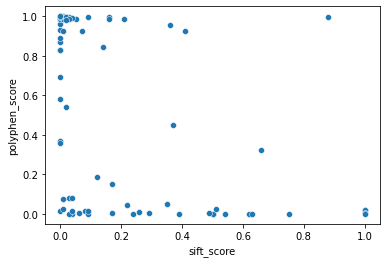

In [9]:
sns.scatterplot(data=variant_data, x="sift_score", y="polyphen_score")

In [10]:
variant_data.iloc[-10:, :]

,most_severe_consequence,id_x,allele_string_x,input,seq_region_name_x,strand_x,assembly_name,end_x,start_x,regulatory_feature_consequences,...,strand,id_y,phenotype_or_disease,clin_sig_allele,clin_sig,pubmed,var_synonyms,somatic,minor_allele_freq,minor_allele
mutation,,,,,,,,,,,,,,,,,,,,,
L100V,missense_variant,rs138969470,A/C/G,rs138969470,4,1,GRCh38,89822254,89822254,NaN,...,1,rs138969470,1.0,G:uncertain_significance,[uncertain_significance],NaN,"{'ClinVar': ['RCV000407834', 'VCV000350105']}",NaN,0.0002,G
P120T,missense_variant,rs779158137,G/T,rs779158137,4,1,GRCh38,89729226,89729226,NaN,...,1,COSV61133651,1.0,NaN,NaN,NaN,{'COSMIC': ['COSM3606979']},1.0,NaN,NaN
D119G,missense_variant,rs1353659879,T/C,rs1353659879,4,1,GRCh38,89729228,89729228,NaN,...,1,rs1353659879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E123K,missense_variant,rs200056149,C/T,rs200056149,4,1,GRCh38,89729217,89729217,NaN,...,1,rs200056149,NaN,NaN,NaN,NaN,NaN,NaN,0.0002,T
T22I,missense_variant,rs1273319141,G/A,rs1273319141,4,1,GRCh38,89835603,89835603,"[{'biotype': 'promoter', 'consequence_terms': ...",...,1,rs1273319141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A53T,missense_variant,rs104893877,C/T,rs104893877,4,1,GRCh38,89828149,89828149,NaN,...,1,CM971400,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G73V,missense_variant,rs1261963254,C/A,rs1261963254,4,1,GRCh38,89822334,89822334,NaN,...,1,rs1261963254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3E,missense_variant,rs1168809349,A/T,rs1168809349,4,1,GRCh38,89835660,89835660,"[{'biotype': 'promoter', 'consequence_terms': ...",...,1,rs1168809349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G41D,missense_variant,rs750512067,C/T,rs750512067,4,1,GRCh38,89828184,89828184,NaN,...,1,rs750512067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
variant_data.columns

Index(['most_severe_consequence', 'id_x', 'allele_string_x', 'input',
       'seq_region_name_x', 'strand_x', 'assembly_name', 'end_x', 'start_x',
       'regulatory_feature_consequences', 'polyphen_prediction',
       'consequence_terms', 'hgvsp', 'cadd_raw', 'uniprot_isoform',
       'swissprot', 'uniparc', 'gene_symbol_source', 'strand_y', 'gene_symbol',
       'hgvsc', 'sift_prediction', 'cds_end', 'variant_allele', 'sift_score',
       'polyphen_score', 'transcript_id', 'hgnc_id', 'cdna_start', 'biotype',
       'cdna_end', 'protein_end', 'impact', 'amino_acids', 'codons', 'gene_id',
       'protein_id', 'cadd_phred', 'cds_start', 'protein_start', 'trembl',
       'canonical', 'flags', 'distance', 'end_y', 'frequencies',
       'seq_region_name_y', 'allele_string_y', 'start_y', 'strand', 'id_y',
       'phenotype_or_disease', 'clin_sig_allele', 'clin_sig', 'pubmed',
       'var_synonyms', 'somatic', 'minor_allele_freq', 'minor_allele'],
      dtype='object')

<AxesSubplot:xlabel='sift_score', ylabel='Count'>

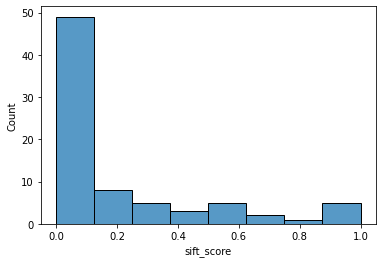

In [12]:
sns.histplot(data=variant_data, x="sift_score")

<AxesSubplot:xlabel='polyphen_score', ylabel='Count'>

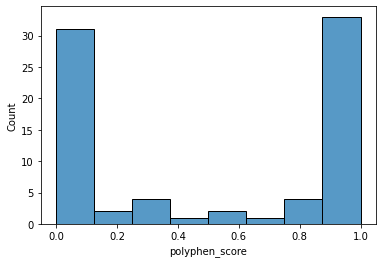

In [13]:
sns.histplot(data=variant_data, x="polyphen_score")

<AxesSubplot:xlabel='cadd_phred', ylabel='Count'>

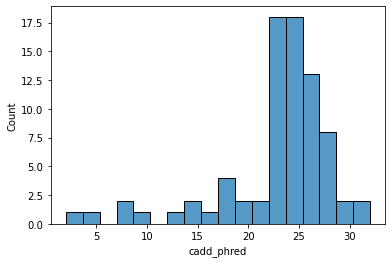

In [14]:
sns.histplot(data=variant_data, x="cadd_phred")

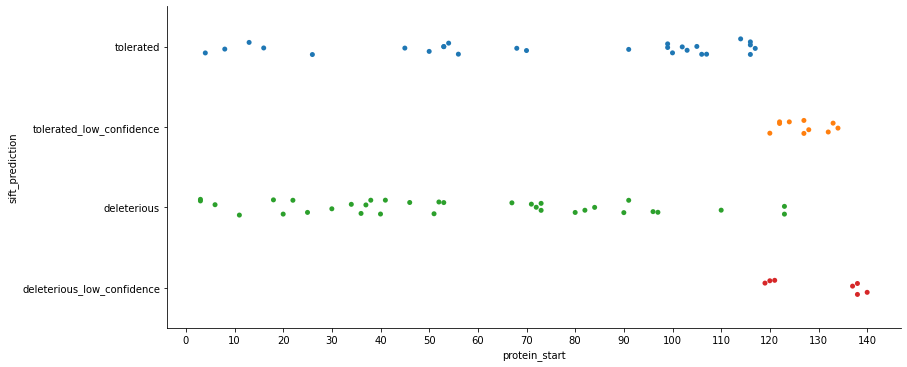

In [15]:
#f = plt.figure(figsize=(10, 60))
g = sns.catplot(data=variant_data, y="sift_prediction", x="protein_start", aspect=2.5)
g.set(xticks=range(0, 150, 10))

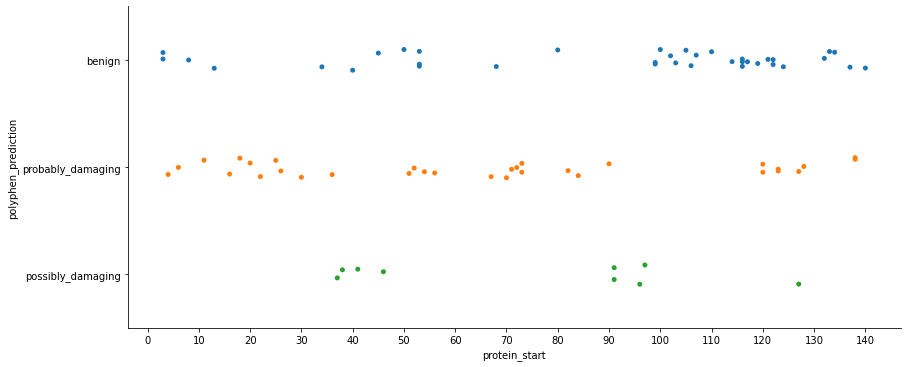

In [16]:
#f = plt.figure(figsize=(10, 60))
g = sns.catplot(data=variant_data, y="polyphen_prediction", x="protein_start", aspect=2.5)
g.set(xticks=range(0, 150, 10))

[[<matplotlib.axis.XTick at 0x7f5362d50790>,

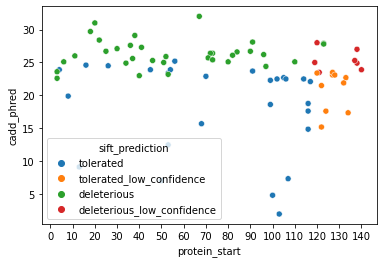

In [32]:
#f = plt.figure(figsize=(10, 60))
g = sns.scatterplot(data=variant_data, y="cadd_phred", x="protein_start", hue="sift_prediction")
g.set(xticks=range(0, 150, 10))

[[<matplotlib.axis.XTick at 0x7f5361406d50>,

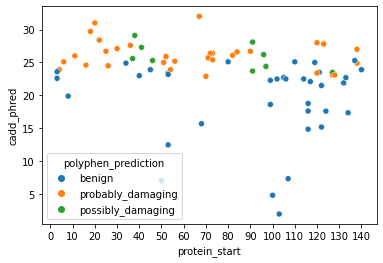

In [33]:
#f = plt.figure(figsize=(10, 60))
g = sns.scatterplot(data=variant_data, y="cadd_phred", x="protein_start", hue="polyphen_prediction")
g.set(xticks=range(0, 150, 10))

[[<matplotlib.axis.XTick at 0x7f5363d68710>,

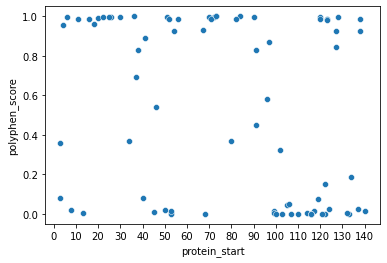

In [18]:
#f = plt.figure(figsize=(10, 60))
g = sns.scatterplot(data=variant_data, y="polyphen_score", x="protein_start")
g.set(xticks=range(0, 150, 10))

[[<matplotlib.axis.XTick at 0x7f5363d359d0>,

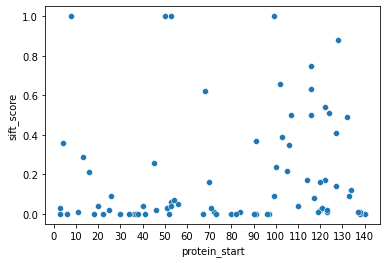

In [19]:
## f = plt.figure(figsize=(10, 60))
g = sns.scatterplot(data=variant_data, y="sift_score", x="protein_start")
g.set(xticks=range(0, 150, 10))

## Variants classified as pathogenic by both SIFT and PolyPhen

In [20]:
variant_data[
    (variant_data.sift_prediction == "deleterious") & (variant_data.polyphen_prediction == "probably_damaging")]

,most_severe_consequence,id_x,allele_string_x,input,seq_region_name_x,strand_x,assembly_name,end_x,start_x,regulatory_feature_consequences,...,strand,id_y,phenotype_or_disease,clin_sig_allele,clin_sig,pubmed,var_synonyms,somatic,minor_allele_freq,minor_allele
mutation,,,,,,,,,,,,,,,,,,,,,
G73C,missense_variant,rs774113587,C/A/T,rs774113587,4,1,GRCh38,89822335,89822335,NaN,...,1,rs774113587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G51D,missense_variant,rs431905511,C/T,rs431905511,4,1,GRCh38,89828154,89828154,NaN,...,1,CM131380,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V52A,missense_variant,rs1239518140,A/G,rs1239518140,4,1,GRCh38,89828151,89828151,NaN,...,1,rs1239518140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G84V,missense_variant,rs386352363,C/A,rs386352363,4,1,GRCh38,89822301,89822301,NaN,...,1,rs386352363,1.0,A:uncertain_significance,[uncertain_significance],NaN,"{'ClinVar': ['RCV000122491', 'VCV000091933']}",NaN,NaN,NaN
G67R,missense_variant,rs1418203843,C/T,rs1418203843,4,1,GRCh38,89822353,89822353,NaN,...,1,rs1418203843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A18G,missense_variant,rs752472160,G/C,rs752472160,4,1,GRCh38,89835615,89835615,"[{'cadd_phred': 29.7, 'regulatory_feature_id':...",...,1,rs752472160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A30P,missense_variant,rs104893878,C/G,rs104893878,4,1,GRCh38,89835580,89835580,"[{'regulatory_feature_id': 'ENSR00000170730', ...",...,1,CM981851,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T72M,missense_variant,rs767026129,G/A/C,rs767026129,4,1,GRCh38,89822337,89822337,NaN,...,1,COSV61133182,1.0,NaN,NaN,NaN,{'COSMIC': ['COSM1266330']},1.0,NaN,NaN
A90P,missense_variant,rs1356365361,C/G,rs1356365361,4,1,GRCh38,89822284,89822284,NaN,...,1,rs1356365361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Variants classified as non-pathogenic by both SIFT and PolyPhen

In [34]:
variant_data[
    (variant_data.sift_prediction == "tolerated") & (variant_data.polyphen_prediction == "benign")]

,most_severe_consequence,id_x,allele_string_x,input,seq_region_name_x,strand_x,assembly_name,end_x,start_x,regulatory_feature_consequences,...,strand,id_y,phenotype_or_disease,clin_sig_allele,clin_sig,pubmed,var_synonyms,somatic,minor_allele_freq,minor_allele
mutation,,,,,,,,,,,,,,,,,,,,,
K45R,missense_variant,rs1030827990,T/C,rs1030827990,4,1,GRCh38,89828172,89828172,NaN,...,1,rs1030827990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K102E,missense_variant,rs1461467439,T/C,rs1461467439,4,1,GRCh38,89822248,89822248,NaN,...,1,rs1461467439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P117S,missense_variant,rs145138372,G/A/T,rs145138372,4,1,GRCh38,89729235,89729235,NaN,...,1,rs145138372,1.0,T:uncertain_significance,[uncertain_significance],NaN,"{'ClinVar': ['RCV000808297', 'VCV000652694']}",NaN,0.0006,A
E13D,missense_variant,rs774124882,C/G/T,rs774124882,4,1,GRCh38,89835629,89835629,"[{'biotype': 'promoter', 'impact': 'MODIFIER',...",...,1,rs774124882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E105A,missense_variant,rs776535649,T/G,rs776535649,4,1,GRCh38,89729270,89729270,NaN,...,1,rs776535649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A53V,missense_variant,rs542171324,G/A/C,rs542171324,4,1,GRCh38,89828148,89828148,NaN,...,1,CM146254,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M116I,missense_variant,rs1378041201,C/T,rs1378041201,4,1,GRCh38,89729236,89729236,NaN,...,1,rs1378041201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A107V,missense_variant,rs1578143026,G/A,rs1578143026,4,1,GRCh38,89729264,89729264,NaN,...,1,rs1578143026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G68E,missense_variant,rs752981956,C/T,rs752981956,4,1,GRCh38,89822349,89822349,NaN,...,1,rs752981956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The list above includes the  A53T and H50Q variants, which are know pathogenic variants.
These are classified as non-pathogenic by both algorithms.

## Known pathogenic variants

In [23]:
variant_data.loc[mutations, :].transpose()

mutation,A53T,A53E,A30P,E46K,H50Q,G51D
most_severe_consequence,missense_variant,missense_variant,missense_variant,missense_variant,missense_variant,missense_variant
id_x,rs104893877,ENST00000336904.7:c.158C>A,rs104893878,rs104893875,rs201106962,rs431905511
allele_string_x,C/T,C/A,C/G,C/T,A/C,C/T
input,rs104893877,ENST00000336904.7:c.158C>A,rs104893878,rs104893875,rs201106962,rs431905511
seq_region_name_x,4,4,4,4,4,4
strand_x,1,-1,1,1,1,1
assembly_name,GRCh38,GRCh38,GRCh38,GRCh38,GRCh38,GRCh38
end_x,89828149,89828148,89835580,89828170,89828156,89828154
start_x,89828149,89828148,89835580,89828170,89828156,89828154
regulatory_feature_consequences,NaN,NaN,"[{'regulatory_feature_id': 'ENSR00000170730', ...",NaN,NaN,NaN


In [24]:
variant_data[
    (variant_data.sift_prediction == "tolerated") & (variant_data.polyphen_prediction == "benign") & (variant_data.cadd_phred > 10)]

,most_severe_consequence,id_x,allele_string_x,input,seq_region_name_x,strand_x,assembly_name,end_x,start_x,regulatory_feature_consequences,...,strand,id_y,phenotype_or_disease,clin_sig_allele,clin_sig,pubmed,var_synonyms,somatic,minor_allele_freq,minor_allele
mutation,,,,,,,,,,,,,,,,,,,,,
K45R,missense_variant,rs1030827990,T/C,rs1030827990,4,1,GRCh38,89828172,89828172,NaN,...,1,rs1030827990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K102E,missense_variant,rs1461467439,T/C,rs1461467439,4,1,GRCh38,89822248,89822248,NaN,...,1,rs1461467439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P117S,missense_variant,rs145138372,G/A/T,rs145138372,4,1,GRCh38,89729235,89729235,NaN,...,1,rs145138372,1.0,T:uncertain_significance,[uncertain_significance],NaN,"{'ClinVar': ['RCV000808297', 'VCV000652694']}",NaN,0.0006,A
E105A,missense_variant,rs776535649,T/G,rs776535649,4,1,GRCh38,89729270,89729270,NaN,...,1,rs776535649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A53V,missense_variant,rs542171324,G/A/C,rs542171324,4,1,GRCh38,89828148,89828148,NaN,...,1,CM146254,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M116I,missense_variant,rs1378041201,C/T,rs1378041201,4,1,GRCh38,89729236,89729236,NaN,...,1,rs1378041201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G68E,missense_variant,rs752981956,C/T,rs752981956,4,1,GRCh38,89822349,89822349,NaN,...,1,rs752981956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L8F,missense_variant,rs1477642198,G/A,rs1477642198,4,1,GRCh38,89835646,89835646,"[{'cadd_phred': 19.9, 'variant_allele': 'A', '...",...,1,rs1477642198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E114D,missense_variant,rs770804878,T/G,rs770804878,4,1,GRCh38,89729242,89729242,NaN,...,1,rs770804878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Write Fasta files

As a last step we write a set of fasta files for the WT and the selected mutants.
These are used as input for structure prediction with AlphaFld.

In [28]:
sequence = gene["protein"]["seq"]
write_fasta("WT", sequence)

for mutation in variant_data.loc[mutations].index.tolist():
    print(mutation)
    if "=" in mutation: continue
    seq = mutate(sequence, mutation)
    write_fasta(mutation, seq, directory="fasta")

A53T
A53E
A30P
E46K
H50Q
G51D
